In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('clean_data.csv')
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,0.0,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03


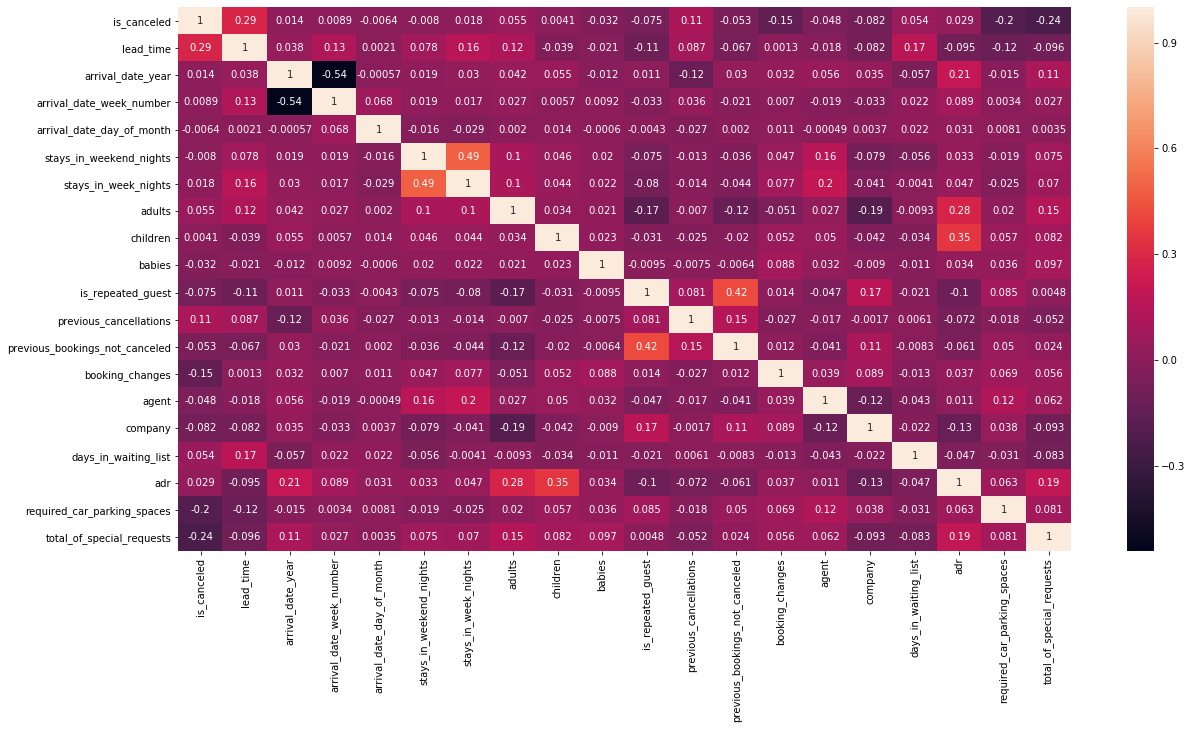

In [4]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116957 entries, 0 to 116956
Data columns (total 32 columns):
hotel                             116957 non-null object
is_canceled                       116957 non-null int64
lead_time                         116957 non-null int64
arrival_date_year                 116957 non-null int64
arrival_date_month                116957 non-null object
arrival_date_week_number          116957 non-null int64
arrival_date_day_of_month         116957 non-null int64
stays_in_weekend_nights           116957 non-null int64
stays_in_week_nights              116957 non-null int64
adults                            116957 non-null int64
children                          116957 non-null float64
babies                            116957 non-null int64
meal                              116957 non-null object
country                           116957 non-null object
market_segment                    116957 non-null object
distribution_channel              116957 n

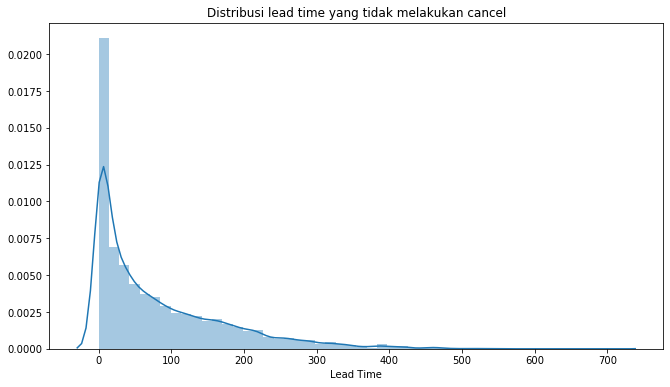

In [25]:
plt.figure(figsize = (11,6))

n_cancel = df[df['is_canceled'] == 0]
sns.distplot(n_cancel['lead_time'], bins = 50)
plt.title('Distribusi lead time yang tidak melakukan cancel')
plt.xlabel('Lead Time')
#plt.savefig('fig-2')

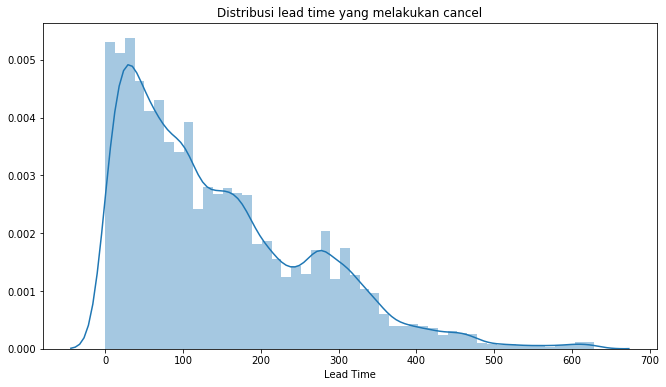

In [26]:
plt.figure(figsize = (11,6))

cancel = df[df['is_canceled'] == 1]
sns.distplot(cancel['lead_time'], bins = 50)
plt.title('Distribusi lead time yang melakukan cancel')
plt.xlabel('Lead Time')
#plt.savefig('fig-3')

### Berdasarkan kedua distribution plot lead time di atas antara yg tidak melakukan cancel dan melakukan cancel, dapat dilihat ada perbedaan antara keduanya. dimana untuk yg tidak melakukan cancel memiliki rata-rata lead time berkisar kurang lebih dari 0 - 30. Sedangkan yang melakukan cancel memiliki rata-rata lead time yang lebih tinggi berkisar kurang lebih antara 0 - 100, bahkan masih tingginya distribusi lead time diatas 100 dibandingkan dengan yg tidak melakukan cancel.

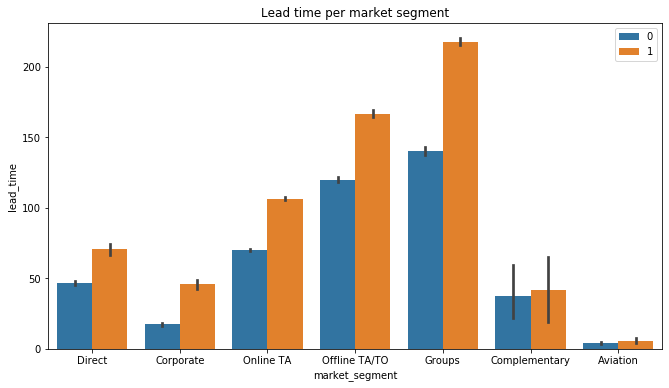

In [48]:
plt.figure(figsize = (11, 6))

sns.barplot(x = 'market_segment', y = 'lead_time', hue = 'is_canceled', data = df)
plt.title('Lead time per market segment')
plt.legend()
#plt.savefig('fig-4')

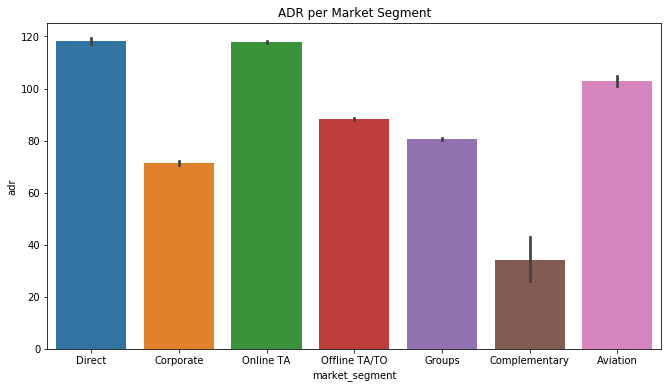

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(11, 6))

sns.barplot(x = 'market_segment',
            y = 'adr',
            data = df
           )

plt.title('ADR per Market Segment')
plt.show()
#plt.savefig('fig-5.png')

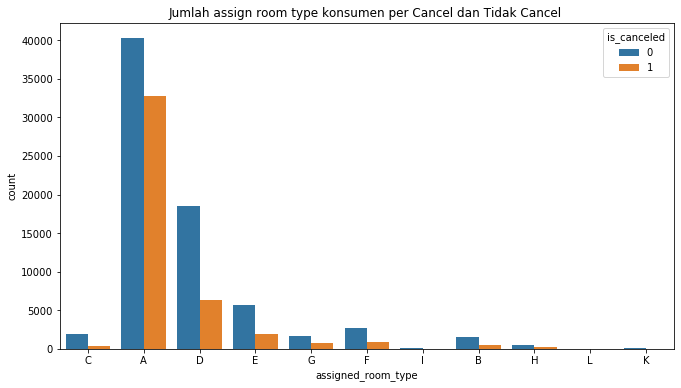

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(11, 6))

sns.countplot(x = 'assigned_room_type', 
              hue = 'is_canceled', 
              data = df)

plt.title('Jumlah assign room type konsumen per Cancel dan Tidak Cancel ')
plt.show()
#plt.savefig('fig-6')

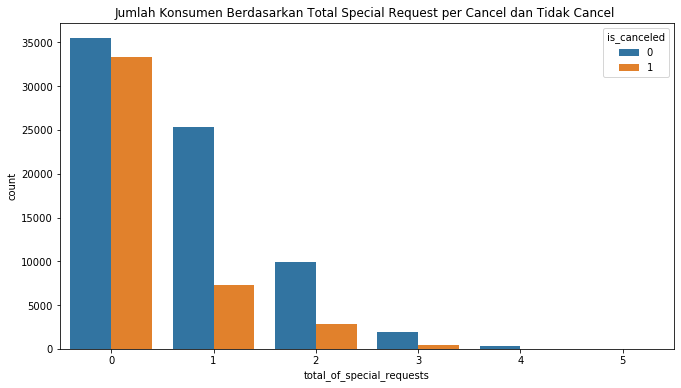

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure(figsize=(11, 6))

sns.countplot(x = 'total_of_special_requests', 
              hue = 'is_canceled',
            data = df)

plt.title('Jumlah Konsumen Berdasarkan Total Special Request per Cancel dan Tidak Cancel ')
plt.show()
#plt.savefig('fig-7')

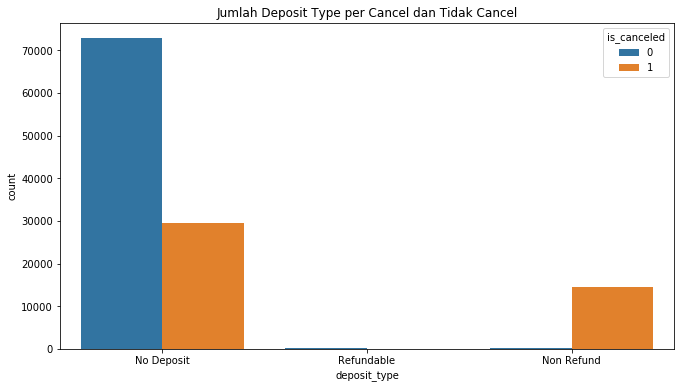

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(11, 6))

sns.countplot(x = 'deposit_type',
              hue = 'is_canceled',
              data = df)

plt.title('Jumlah Deposit Type per Cancel dan Tidak Cancel')
plt.show()
#plt.savefig('fig-8')

<Figure size 792x432 with 0 Axes>

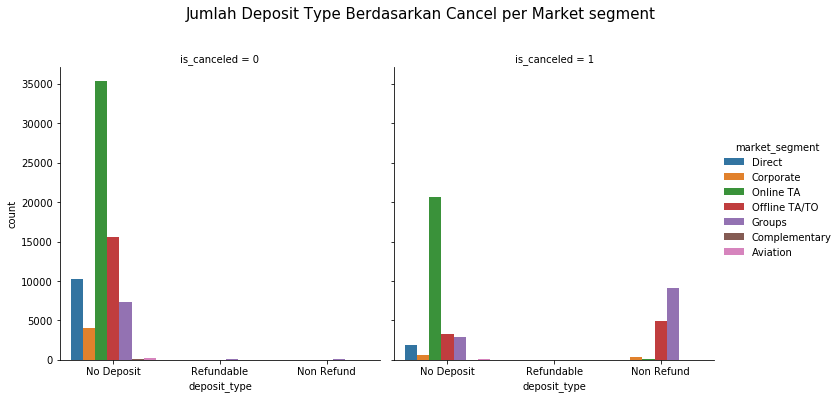

<Figure size 432x288 with 0 Axes>

In [50]:
plt.figure(figsize=(11, 6))

sns.catplot(x = "deposit_type", 
            hue = "market_segment", 
            col = "is_canceled", 
            data = df, 
            kind = "count")

plt.suptitle(x = 0.5, y = 1.1, t = 'Jumlah Deposit Type Berdasarkan Cancel per Market segment', fontsize = 15)
plt.show()
#plt.savefig('fig-9')

In [53]:
is_canceled = df['is_canceled'].value_counts()

fig = px.pie(is_canceled, 
             values = is_canceled.values, 
             names = is_canceled.index, 
             title = 'Proporsi Antara Cancel dan Tidak Cancel', 
             template = 'seaborn'
            )

fig.update_traces(rotation = -90, textinfo = 'value+percent')
fig.show()
#plt.savefig('fig-10')

<Figure size 432x288 with 0 Axes>

In [16]:
canceled_df = df[df['is_canceled'] == 1]['reservation_status'].value_counts()

fig = px.pie(canceled_df, 
             values = canceled_df.values, 
             names = canceled_df.index, 
             title = 'Proporsi Konsumen yang Melakukan Cancel dibagi Antara Cancel & No-Show', 
             template = 'seaborn'
            )

fig.update_traces(rotation = -90, textinfo = 'value+percent')
fig.show()
#plt.savefig('fig-11')

In [17]:
canceled_df = df[df['is_canceled'] == 1]['country'].value_counts()

fig = px.pie(canceled_df, 
             values = canceled_df.values, 
             names = canceled_df.index, 
             title = 'Proporsi Konsumen yang Melakukan Cancel dibagi Berdasarkan Negara Konsumen', 
             template = 'seaborn'
            )

fig.update_traces(rotation = -90, textinfo = 'value+percent')
fig.show()
#plt.savefig('fig-12')

In [18]:
cust_type = df['customer_type'].value_counts()

fig = px.pie(cust_type, 
             values = cust_type.values, 
             names = cust_type.index, 
             title = 'Booking Berdasarkan Customer Type', 
             template = 'seaborn'
            )

fig.update_traces(rotation = -90, textinfo = 'value+percent')
fig.show()
#plt.savefig('fig-13')